In [1]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import numpy as np
import os
SSAI_PATH = "/Users/ramachandrank/Repos/SSAI-3D/"

In [2]:
raw_tif_pth, kernel_num, project_depth, data_pth = \
    f"{SSAI_PATH}/raw_data/oct.tif", 3, 5, './demo_dataset'


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dz/fg9tl53x4y16ytgmdhwdt0kr0000gn/T/ipykernel_83661/705751698.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"2D Gaussian Filter ($\sigma_x$={std_x}, $\sigma_y$={std_y})")
/var/folders/dz/fg9tl53x4y16ytgmdhwdt0kr0000gn/T/ipykernel_83661/705751698.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"2D Gaussian Filter ($\sigma_x$={std_x}, $\sigma_y$={std_y})")


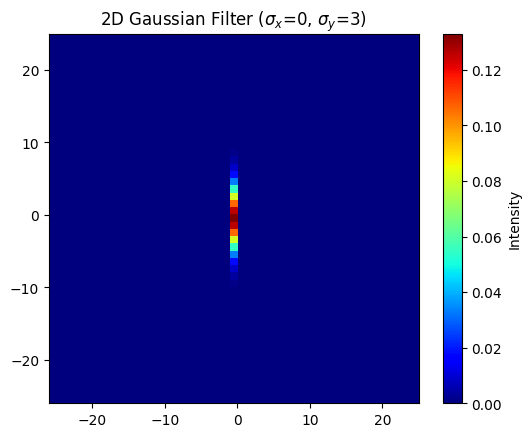

In [3]:
from oct.utils.filter import g_filter
from matplotlib import pyplot as plt

size = 51
std_x = 0
std_y = 3
filtered = g_filter(size, std_x, std_y)

# Plot the result
plt.imshow(filtered, cmap='jet', extent=[-size//2, size//2, -size//2, size//2])
plt.colorbar(label='Intensity')
plt.title(f"2D Gaussian Filter ($\sigma_x$={std_x}, $\sigma_y$={std_y})")
plt.show()


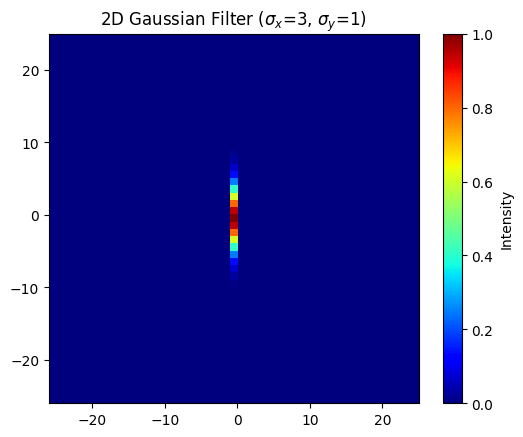

In [6]:
from basicsr.utils.gf import gk_simple
size = 51
std_x = 3
std_y = 1
filtered = gk_simple(size, std_x)

# Plot the result
plt.imshow(filtered, cmap='jet', extent=[-size//2, size//2, -size//2, size//2])
plt.colorbar(label='Intensity')
plt.title(f"2D Gaussian Filter ($\sigma_x$={std_x}, $\sigma_y$={std_y})")
plt.show()

In [7]:
from basicsr.utils.dataset import normalize, resize
from scipy import signal
import tifffile

def train_creation(raw_tif_pth, save_pth, kernel_num = 7, gf_function = gk_simple, kernel_size = 51, gf_args = [3]):

    raw_data = tifffile.imread(raw_tif_pth)
    raw_data = normalize(raw_data)
    kernel_lst = []
    res_lst = [[] for _ in range(kernel_num)]
    z_slices = raw_data.shape[0]
    
    proj_idx = project_depth
    # slices= number of slices when proj_idx number of images are used to create projections
    slices = (raw_data.shape[0]//proj_idx) - 1 
    
    # Creates k gaussian filters with std 3, 5,...,(kernel_num -1) * 2 + 3
    for idx, std in enumerate(np.arange(3,101,2)):
        if idx >= kernel_num:
            break

        kernel_lst.append(gf_function(kernel_size, *gf_args))
    os.makedirs(save_pth, exist_ok=True)
    # Create a new array with images that are convolved with gaussian kernel and blurred
    # using given downsample rate. dimension k * z_slices * x * y
    for slice_idx in range(z_slices):
        raw_slice = raw_data[slice_idx]
        for idx, k in enumerate(kernel_lst):
            conved_slice = signal.fftconvolve(raw_slice, k, mode = 'same')
            res_lst[idx].append(conved_slice)
            assert conved_slice.shape == raw_slice.shape
    stacks = [np.stack(s) for s in res_lst]
    for idx, stack in enumerate(stacks):
        stack = normalize(stack)
        for slice_idx, slice in enumerate(stack):
            tifffile.imwrite(os.path.join(save_pth, f'{slice_idx}.tiff'), slice)
    return 


In [10]:
train_creation(raw_tif_pth, "test/2d_gaussian", kernel_num = 1, gf_function=g_filter, kernel_size=51, gf_args=(3,1))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ramachandrank/Documents/Tbpl/SSAI-3D/oct/raw_data/oct.tif'

In [53]:
train_creation(raw_tif_pth, "test/gk_simple_wo_dr", kernel_num = 1, gf_function=gk_simple, kernel_size=51, gf_args=[3])

In [45]:
train_creation(raw_tif_pth, "test/2d_gaussian_x<y", kernel_num = 1, gf_function=g_filter, kernel_size=51, gf_args=(1,3))

In [ ]:
train_creation(raw_tif_pth, "test/2d_gaussian_x<y", kernel_num = 1, gf_function=g_filter, kernel_size=51, gf_args=(1,3))

In [49]:
train_creation(raw_tif_pth, "test/gk_simple_7", kernel_num = 1, gf_function=gk_simple, kernel_size=51, gf_args=[7])

In [51]:
train_creation(raw_tif_pth, "test/gk_simple", kernel_num = 1, gf_function=gk_simple, kernel_size=51, gf_args=[3])

In [8]:
space = np.arange(0,1000, 5)
print(space)


[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535
 540 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625
 630 635 640 645 650 655 660 665 670 675 680 685 690 695 700 705 710 715
 720 725 730 735 740 745 750 755 760 765 770 775 780 785 790 795 800 805
 810 815 820 825 830 835 840 845 850 855 860 865 870 875 880 885 890 895
 900 905 910 915 920 925 930 935 940 945 950 955 960 965 970 975 980 985
 990 995]


In [14]:
raw_data = tifffile.imread(raw_tif_pth)
space = np.arange(0,raw_data.shape[0], 5)
img = raw_data[124][space]

In [20]:
raw_data.shape

(500, 900, 500)

In [60]:
print(space)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495]


In [ ]:
tifffile.imwrite(os.path.join("test", f'dr.tiff'), img)
tifffile.imwrite(os.path.join("test", f'wdr.tiff'), raw_data[124])


In [22]:

tifffile.imwrite(os.path.join("test", f'yz.tiff'), raw_data[:,124])
tifffile.imwrite(os.path.join("test", f'xy.tiff'), raw_data[124])
tifffile.imwrite(os.path.join("test", f'xz.tiff'), raw_data[:,:,124])


In [16]:
img = tifffile.imread(os.path.join("test", f'wdr.tiff'))
x = img.shape[0]
y = img.shape[1]
x_center, y_center = img.shape[0] // 2, img.shape[1] // 2
os.makedirs("test/zs", exist_ok=True)
tifffile.imwrite(os.path.join("test", f'zs/xy.tiff'), img[x_center-200:x_center+100, y_center-200:y_center+100])
